In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:09<00:00, 154MB/s]
100% 1.06G/1.06G [00:09<00:00, 118MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

We will now create generators ,The main motive behind generators is that when we work on large dataset there maybe a chance that our ram space may runout so generators will split data into batches and then perform Algorithms on it to train or test

In [9]:
#Generators
train_df=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
test_df=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Now after creating generator all files stored in numpy format but now the proble is that for numpy values it ranges from 0-255 but we have to normalize it to 0-1
For Normalisation we will create a process function which fetch an image and label  and on image we will divide it by 255 and thenwe will return image and label so basically main reason to perform this function because we want all pixel values of images should be in range of 0-1

In [10]:
#Normalize
def process(image,label):
  image= tf.cast(image/255. ,tf.float32)
  return image,label

train_df = train_df.map(process)
test_df= test_df.map(process)


In [11]:
# CREATE CNN MODEL
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_df,epochs=10,validation_data=test_df)

Epoch 1/10
625/625 [==============================] - 82s 107ms/step - loss: 1.2532 - accuracy: 0.6044 - val_loss: 0.6347 - val_accuracy: 0.6426
Epoch 2/10
625/625 [==============================] - 72s 114ms/step - loss: 0.5653 - accuracy: 0.6987 - val_loss: 0.5433 - val_accuracy: 0.7210
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4972 - accuracy: 0.7510 - val_loss: 0.5677 - val_accuracy: 0.6998
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4377 - accuracy: 0.7930 - val_loss: 0.5591 - val_accuracy: 0.7618
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3875 - accuracy: 0.8225 - val_loss: 0.4938 - val_accuracy: 0.7714
Epoch 6/10
625/625 [==============================] - 68s 107ms/step - loss: 0.3556 - accuracy: 0.8458 - val_loss: 0.4656 - val_accuracy: 0.8090
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2724 - accuracy: 0.8827 - val_loss: 0.5856 - val_ac

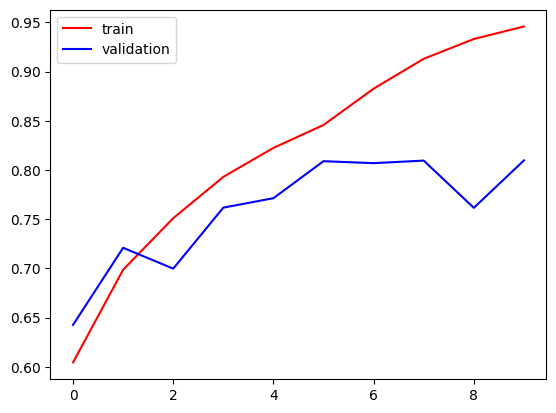

In [15]:
#Lets check the training by plotting graph
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

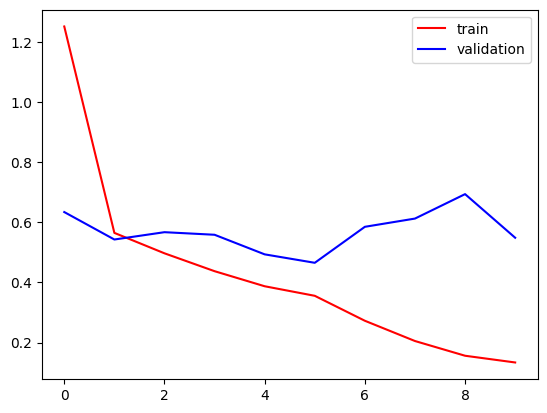

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
#Lets test our model on unseen data
import cv2

In [18]:
test_img = cv2.imread('/content/Dog.jpg')

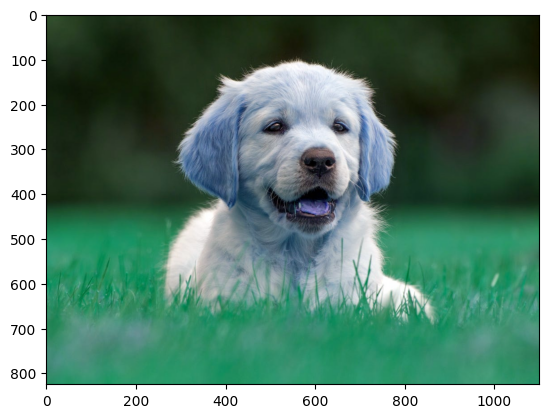

In [19]:
plt.imshow(test_img)

In [20]:
test_img.shape

(825, 1100, 3)

In [21]:
test_img=cv2.resize(test_img,(256,256))

In [22]:
test_input = test_img.reshape((1,256,256,3))

In [23]:
model.predict(test_input)

1/1 [==============================] - 1s 500ms/step


array([[1.]], dtype=float32)

As we ran the test we got output as 1 which is for dog because as cat was in prior to dog for training so its correct lets predict for cat now

In [26]:
test_img2 = cv2.imread('/content/cat.jpg')

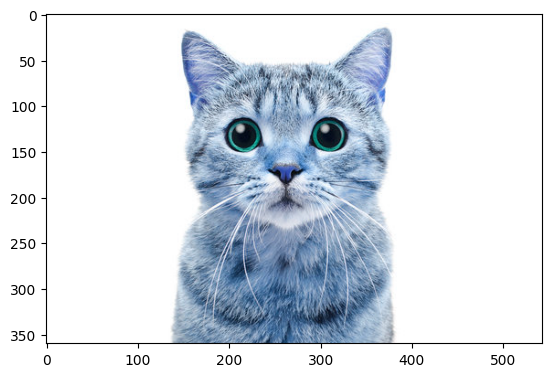

In [27]:
plt.imshow(test_img2)

In [28]:
test_img2.shape

(360, 543, 3)

In [29]:
test_img2=cv2.resize(test_img2,(256,256))

In [30]:
test_input2 = test_img2.reshape((1,256,256,3))

In [31]:
model.predict(test_input2)

1/1 [==============================] - 0s 29ms/step


array([[0.]], dtype=float32)